# Проект: Принятие решений в бизнесе
Как аналитик крупного интернет-магазина вместе с отделом маркетинга подготовил список гипотез для увеличения выручки.
Цуль проекта приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

## План работы
### Загрузить данные из CSV-файлов в переменные.
* Изучить данные и выполнить предобработку. Определить есть ли в данных пропуски и дубликаты? Убедиться, что типы данных во всех колонках соответствуют сохранённым в них значениям. В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Часть 1. Приоритизация гипотез.
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Часть 2. Анализ A/B-теста
* Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
*Задача*
* Проанализируйте A/B-тест:
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. 

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

In [2]:
def information(df):
    duplicates=df.duplicated().sum()
    isnull=df.isnull().sum()
    return df.info(),df.head(), print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m',duplicates),print('\033[1m' + 'Количество пропущенных значений в таблице:' + '\033[0m',isnull)

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
information(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Количество дубликатов в таблице: 0
Количество пропущенных значений в таблице: Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


(None,
                                           Hypothesis  Reach  Impact  \
 0  Добавить два новых канала привлечения трафика,...      3      10   
 1  Запустить собственную службу доставки, что сок...      2       5   
 2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
 3  Изменить структура категорий, что увеличит кон...      8       3   
 4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
 
    Confidence  Efforts  
 0           8        6  
 1           4       10  
 2           7        3  
 3           3        8  
 4           1        1  ,
 None,
 None)

In [5]:
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]

In [6]:
orders = pd.read_csv('/datasets/orders.csv')

In [7]:
information(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дубликатов в таблице: 0
Количество пропущенных значений в таблице: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


(None,
    transactionId   visitorId        date  revenue group
 0     3667963787  3312258926  2019-08-15     1650     B
 1     2804400009  3642806036  2019-08-15      730     B
 2     2961555356  4069496402  2019-08-15      400     A
 3     3797467345  1196621759  2019-08-15     9759     B
 4     2282983706  2322279887  2019-08-15     2308     B,
 None,
 None)

In [8]:
orders['date'] = orders['date'].astype('datetime64')
orders.columns = [x.lower().replace('id', '_id') for x in orders.columns.values]

In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
information(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дубликатов в таблице: 0
Количество пропущенных значений в таблице: date        0
group       0
visitors    0
dtype: int64


(None,
          date group  visitors
 0  2019-08-01     A       719
 1  2019-08-02     A       619
 2  2019-08-03     A       507
 3  2019-08-04     A       717
 4  2019-08-05     A       756,
 None,
 None)

In [11]:
visitors['date'] = visitors['date'].astype('datetime64')

 *Промежуточный вывод*
* Типы данных даты во всех датафреймах привели к типу datetime64
* Явных дубликатов и пропущенных знаечний ни в одном из датафреймов не обнаружено
* Названия столбцов в каждом датафрейме приведены к общему стилю

## Приоритезация гипотез

In [12]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending =False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


In [13]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending =False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


*Промежуточные выводы по оценке гипотез*

По фреймворку ICE: наибольшую оценку имели гипотезы 8,0 и 7 - а RICE : 7,2 и 0. Это объясняется тем, что в случае фреймворка ICE в отличие от RICE мы не учитывали Reach — скольких пользователей затронет изменение, которое мы хотим внести.

В нашем случае наиболее приоритетными гипотезами будут 7, 2, 0.

##  Анализ A/B-теста

In [14]:
orders_A = orders[orders['group'] == 'A'][['visitor_id']]
orders_B = orders[orders['group'] == 'B'][['visitor_id']]
orders_AB = orders_A.merge(orders_B, on='visitor_id')
orders_AB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   visitor_id  183 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [15]:
orders=orders.query("visitor_id not in @orders_AB['visitor_id']")

In [16]:
information(orders)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB
Количество дубликатов в таблице: 0
Количество пропущенных значений в таблице: transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64


(None,
    transaction_id  visitor_id       date  revenue group
 0      3667963787  3312258926 2019-08-15     1650     B
 1      2804400009  3642806036 2019-08-15      730     B
 3      3797467345  1196621759 2019-08-15     9759     B
 4      2282983706  2322279887 2019-08-15     2308     B
 5       182168103   935554773 2019-08-15     2210     B,
 None,
 None)

Количество посетителей в группе А: 18736
Количество посетителей в группе B: 18916
Суммарное количество посетителей: 37652
Количество покупок в группе A: 468
Количество покупок в группе B: 548


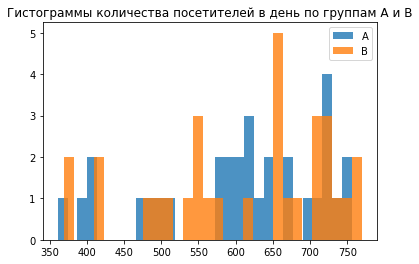

P-value:0.7301376549390499
Разница в количестве посетителей в группах A и B статистически не значима



In [17]:
print('Количество посетителей в группе А: {}'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Количество посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))
print('Суммарное количество посетителей: {}'.format(visitors['visitors'].sum()))
purchases_a = len(orders[orders['group']=='A'])
purchases_b = len(orders[orders['group']=='B'])
print('Количество покупок в группе A: {}'.format(purchases_a))
print('Количество покупок в группе B: {}'.format(purchases_b))
plt.hist(visitors[visitors['group']=='A']['visitors'], alpha = 0.8, label='A', bins = 30)
plt.hist(visitors[visitors['group']=='B']['visitors'], alpha = 0.8, label='B', bins = 30)
plt.legend()
plt.title('Гистограммы количества посетителей в день по группам A и B')
plt.show()

results = stats.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('P-value:{}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима\n')
else:
    print('Разница в количестве посетителей в группах A и B статистически не значима\n')

In [18]:
results = stats.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('P-value:{}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима\n')
else:
    print('Разница в количестве посетителей в группах A и B статистически не значима\n')

conversion_a = len(orders[orders['group']=='A']) / visitors[visitors['group']=='A']['visitors'].sum() 
conversion_b = len(orders[orders['group']=='B']) / visitors[visitors['group']=='B']['visitors'].sum()
print('Начальная конверсия: {:.3f}'.format(conversion_a))
print('Полученная после изменений конверсия: {:.3f}'.format(conversion_b))
print('Относительное изменение конверсии после изменений: {:.3f}'.format(abs(1-(conversion_a/conversion_b))))

P-value:0.7301376549390499
Разница в количестве посетителей в группах A и B статистически не значима

Начальная конверсия: 0.025
Полученная после изменений конверсия: 0.029
Относительное изменение конверсии после изменений: 0.138


При помощи калькулятора: https://www.evanmiller.org/ab-testing/sample-size.html
Получаем необходимое количество выборки для корректного исследования, на основании начальной конверсии и относительного изменения конверсия - 35855.В нашем случае количество 37652 посещений
Количество выборки для A/B тестирования корректно подобрано.
Нулевая гипотеза ,что разница в количестве пользователей между группами статистически значима не подтвердилась.

In [19]:
orders_filt = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

orders_aggregated = orders_filt.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis = 1)
orders_aggregated.columns = ['date', 'group', 'transactions', 'payers', 'revenue']

visitors_aggregated = orders_filt.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'], x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)
cummulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cummulative_data.head(5)

,date,group,transactions,payers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


### Построим график кумулятивной выручки по группам

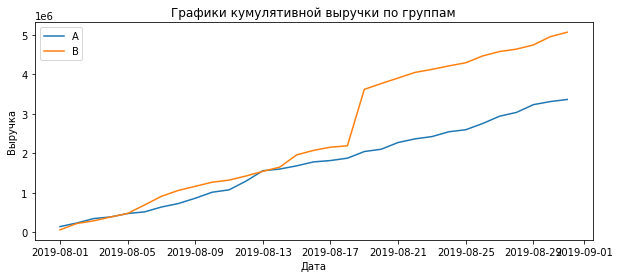

In [20]:
cummulative_data_a = cummulative_data[cummulative_data['group']=='A']
cummulative_data_b = cummulative_data[cummulative_data['group']=='B']
plt.figure(figsize=(10,4))
plt.plot(cummulative_data_a['date'], cummulative_data_a['revenue'], label = 'A')
plt.plot(cummulative_data_b['date'], cummulative_data_b['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам')
plt.legend()
plt.show()

*Из графика следует,что кумулятивная вырочка в группе В на протяжении всего теста выше чем в группе А с резким скачком (без последующего снижения) после 18 августа(возможно это связано с выбросами).*

### Построим график кумулятивного среднего чека по группам

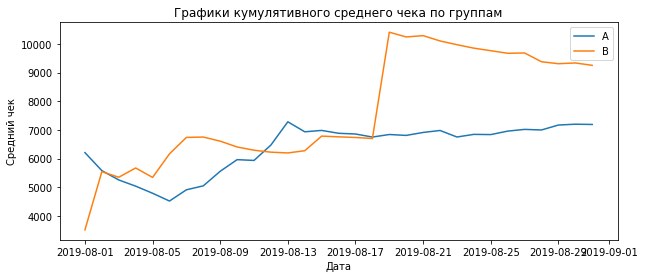

In [21]:
plt.figure(figsize=(10,4))
plt.plot(cummulative_data_a['date'], cummulative_data_a['revenue']/cummulative_data_a['transactions'], label = 'A')
plt.plot(cummulative_data_b['date'], cummulative_data_b['revenue']/cummulative_data_b['transactions'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

*График о кумулятивном среднем чеке подвтерждает возможные опасения вызванные прошлым графиком о наличии выбросо в группе В после 18 августа,из-за резкого увеличения величины среднего чека*

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

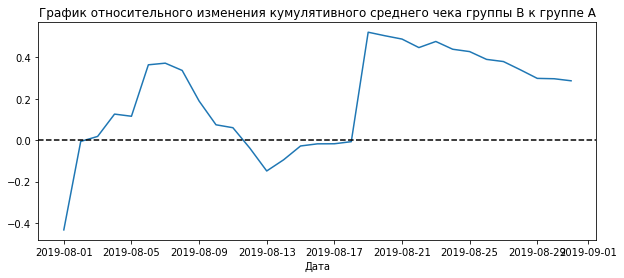

In [22]:
merged_cummulative_data = cummulative_data_a.merge(cummulative_data_b, 
                                                   left_on='date', 
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['_a', '_b'])

plt.figure(figsize=(10,4))
plt.plot(merged_cummulative_data['date'], 
         ((merged_cummulative_data['revenue_b']/merged_cummulative_data['transactions_b'])/
                                       (merged_cummulative_data['revenue_a']/merged_cummulative_data['transactions_a'])-1))
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

*Данный график так же подтверждает опасения о наличии аномальных значений,в связи с выраженными колебаниями*

### Построим график кумулятивного среднего количества заказов на посетителя по группам. 

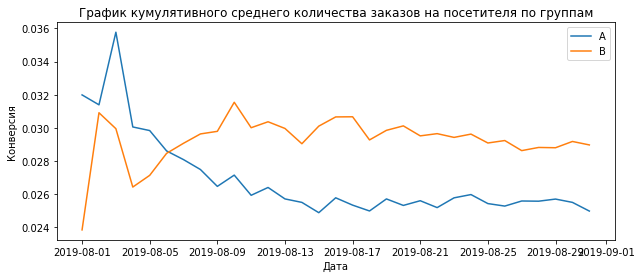

In [23]:
merged_cummulative_data['conversion_a'] =  merged_cummulative_data['transactions_a'] / merged_cummulative_data['visitors_a'] 
merged_cummulative_data['conversion_b'] =  merged_cummulative_data['transactions_b'] / merged_cummulative_data['visitors_b']
plt.figure(figsize=(10,4))
plt.plot(merged_cummulative_data['date'], merged_cummulative_data['conversion_a'], label='A')
plt.plot(merged_cummulative_data['date'], merged_cummulative_data['conversion_b'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

*Группа В уже с самого начала эксперимента(после 6-7 аавгуста) показывает большее количество средних заказов на посетителя(конверсия стабильно выше).*

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

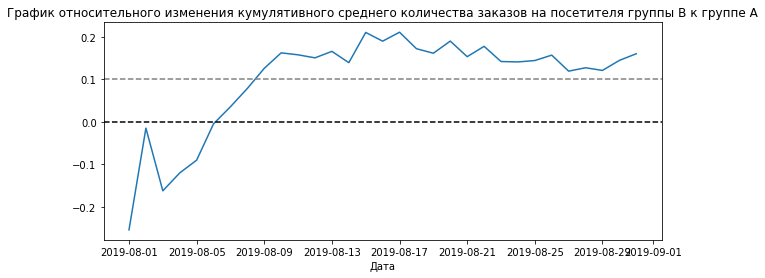

In [24]:
plt.figure(figsize=(10,4))
plt.plot(merged_cummulative_data['date'], 
         ((merged_cummulative_data['conversion_b']/merged_cummulative_data['conversion_a'])-1))
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.show()

*Кумулятивное среднее количества заказов для группы В с начала второй недели стабильно выше относительно группы А*

### Построим точечный график количества заказов по пользователям

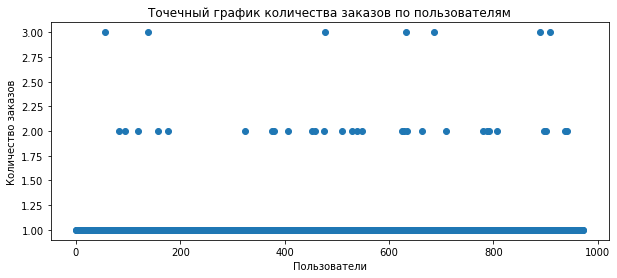

In [25]:
transactions_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
x_values = pd.Series(range(0,len(transactions_by_users)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, transactions_by_users['transaction_id']) 
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

*Исходя из графика большинство пользователей совершают от одного до 3 заказов*

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [26]:
print(np.percentile(transactions_by_users['transaction_id'], [90, 95, 99]))

[1. 1. 2.]


*95% пользователей совершают не более 2 заказов.*

### Построим точечный график стоимостей заказов.

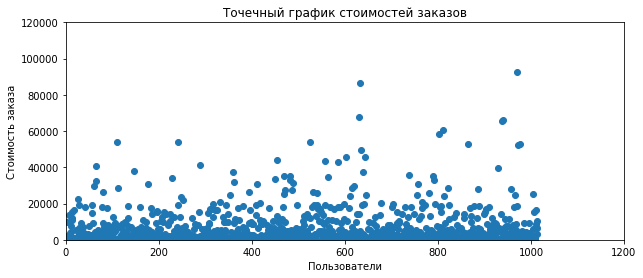

In [27]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.axis([0, 1200, 0, 120000])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.show()

*Основное количество заказов по пользователям не превышает по стоимости 20000.*

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [28]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


*95% сумм заказов на пользовталей дешевле 26785.*

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [30]:
orders_by_visitor_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

orders_by_visitor_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
) 

In [31]:
sample_a = pd.concat(
    [
        orders_by_visitor_a['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_visitor_a['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_visitor_b['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_visitor_b['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
results = stats.mannwhitneyu(sample_a, sample_b)
print('P-value: {}'.format(results.pvalue))
print('Относительный прирост конверсии группы B по отношению к группе A по "сырым" данным:{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

P-value: 0.011018084110014696
Относительный прирост конверсии группы B по отношению к группе A по "сырым" данным:0.160


Н0- разница в среднем количестве заказов на посетителя между группами статистически значима.

Н1- разница в среднем количестве заказов на посетителя между группами статистически НЕ значима

По "сырым" данным учитывая ,что alpha=0.05 принимаем нулевую гипотезу.

In [32]:
print('Разница среднего чека в группе B по отношению группы A по "сырым" данным: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results_2.pvalue))

Разница среднего чека в группе B по отношению группы A по "сырым" данным: 0.287
P-value: 0.8294908998149533


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Н0- разница среднего чека в группе B по отношению группы A статистически  значима.

Н1- разница среднего чека в группе B по отношению группы A статистически НЕ значима

По "сырым" данным учитывая ,что alpha=0.05 отвергаем нулевую гипотезу.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

In [33]:
visitors_with_many_orders = pd.concat(
    [
        orders_by_visitor_a[orders_by_visitor_a['transaction_id'] > 2]['visitor_id'],
        orders_by_visitor_b[orders_by_visitor_b['transaction_id'] > 2]['visitor_id'],
    ],
    axis=0,
)
visitors_with_expensive_orders = orders[orders['revenue'] > 26785]['visitor_id']
abnormal_users = (
    pd.concat([visitors_with_many_orders, visitors_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64
58


In [34]:
sample_a_filtered = pd.concat(
    [
        orders_by_visitor_a[
            np.logical_not(orders_by_visitor_a['visitor_id'].isin(abnormal_users))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_visitor_a['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_visitor_b[
            np.logical_not(orders_by_visitor_b['visitor_id'].isin(abnormal_users))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_visitor_b['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [35]:
print('P-value:{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный прирост конверсии группы B по отношению к группе A по "очищенным" данным:{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

P-value:0.012
Относительный прирост конверсии группы B по отношению к группе A по "очищенным" данным:0.182


Н0- разница в среднем количестве заказов на посетителя между группами статистически значима.

Н1- разница в среднем количестве заказов на посетителя между группами статистически НЕ значима

По "очищенным" данным учитывая ,что alpha=0.05 принимаем нулевую гипотезу.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [36]:
print(
    'P-value:{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительное изменение среднего чека в группе B по отношению группы A по "очищенным" данным:{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value:0.646
Относительное изменение среднего чека в группе B по отношению группы A по "очищенным" данным:-0.048


Н0- разница среднего чека в группе B по отношению группы A статистически  значима.

Н1- разница среднего чека в группе B по отношению группы A статистически НЕ значима

По "очищенным" данным учитывая ,что alpha=0.05 отвергаем нулевую гипотезу.

#   Решение по результатам теста


После очистки от аномальных пользователей( с суммой заказа больше 28000 и количеством заказов больше 2) разница между средними чеками стала минимальна.
Статистически значимой разницы по среднему чеку нет (чек не увеличился, но и не уменьшился), при этом разница в количестве заказов статистически значима - значит мы заканчиваем анализ A/B-теста - он оказался успешным.

* Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B(начиная с конца первой недели). 
* До и после очистки данных, показатель конверсии в группе B больше показателя в группе A - сначала на 13.8% до и на 17.3% после очистки данных. Данная разница показателей конверсии между группами и до и после очистки данных является статистически значимой.

Зафиксируем победу группы В.